<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Максим! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела. 
     
    
 

<div class="alert alert-warning">


Совет: 
   
Вопросик, при желании можешь ответить )
    
    
- а почему по твоему была выбрана метрика f1? 
    
    
- а что если бы нам было нужно найти как можно больше токсичных комментариев, в этом случаи на какую метрику мы бы ориентировались?
    
    
- каким образом мы можем изменить функцию ошибки в модели, чтобы она максимизировала интересующую нас метрику (accuracy, f1, precision, roc-auc итп)?    



</div>

## Глава 1. Загрузка и подготовка данных

Инициализируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import warnings

import transformers as tfm
from tqdm import notebook

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,accuracy_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV,ShuffleSplit,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [2]:
warnings.filterwarnings('ignore')

Инициализируем константы:

In [3]:
RS = 42



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

    
    
 

    
- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Хорошо, я прочитал статью, вроде бы понял.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены изменения в структуру инициализации библиотек
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Привет Максим!
    
    
Теперь не вижу что можно поправить




</div>


Прочитаем файл и рассмотрим таблицу:

In [4]:
df = pd.read_csv('toxic_comments.csv', index_col=0).reset_index(drop=True)
df

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159287,""":::::And for the second time of asking, when ...",0
159288,You should be ashamed of yourself \n\nThat is ...,0
159289,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,And it looks like it was actually you who put ...,0


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    

<div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Понял, спасибо!
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> 

Использован более локаничный способ чтения файла с использванием `Unnamed: 0`

</div>

Понадобилось удалит строку индексов изначально заложенную в файл

Выведем информацию о таблице через метод `.info()`:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Посмотрим на распределение целевого признака:

[Text(0.5, 0, 'Токсичность'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Соотношение токсичных и обычных комментариев')]

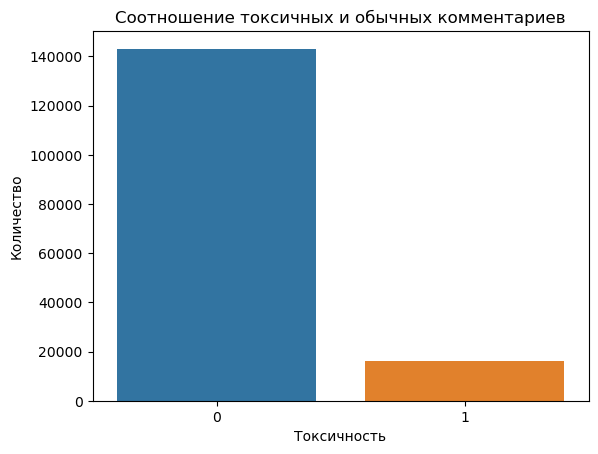

In [6]:
ax = sns.countplot(x='toxic', data=df)
ax.set(xlabel= "Токсичность",ylabel= "Количество", title= "Соотношение токсичных и обычных комментариев")

In [7]:
df['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

In [8]:
print(f"Дубликаты: {df.duplicated().sum()}")

Дубликаты: 0


In [9]:
print(f"Количество NaN:\n{df.isnull().sum()}")

Количество NaN:
text     0
toxic    0
dtype: int64


Присутствует сильный дисбаланс классов, необходимо это исправить при обучении моделей.

### Вывод:
- Данных больше 100 тысяч строк, обработка займет больших мощностей для этого нужно использовать GPU for PyTorch
- Данные без пропусков и дубликатов
- Присутсвует дисбаланс классов

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 


Плюс за

    

-  проверку на сбалансированность 



- Промежуточный вывод в конце раздела



- убрав стопслова можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах Кроме того графики, рисунки делают проект визуально интересней    

## Глава 2. Обучение моделей

Будет обучено несколько моделей: 
- **LogisticRegression**
- **RandomForestClassifier**
- **LGBMClassifier**


Для обработки текстов будет использована модель **BERT**

Для подбора гиперпараметров впосользуумся `GridSearchCV`, для кросс-валидации воспользуемся `ShuffleSplit`

Кросс-валидации для подбора параметров:

In [10]:
CV = ShuffleSplit(n_splits=3, test_size=0.25, random_state=RS)



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



В случаи использования Берта разрешается кардинально порезать датасет (1500 на train, test 500 к примеру). Но перед тем как сделать выборку из нашего датасета стоит изучить баланс в таргете и сделать выборку в которой будет сохраняться существующие пропорции. Тут подойдёт train_test_split c stratify. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут

    
    

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Хорошо, я уменьшил выборку через train_test_split использовал  stratify как в статье.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены изменения train_test_split используется с stratify.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Здорово что сразу используешь жёлтый советы




</div>


### BERT

Необходимые библиотеки были загружены в начале проекта

Будем использовать полную модель BERT.

Загрузим предобученную модель с использование `CUDA` и токенизатор:

In [11]:
tokenizer = tfm.BertTokenizer.from_pretrained('unitary/toxic-bert')
model = tfm.BertModel.from_pretrained('unitary/toxic-bert').to("cuda:0")

Some weights of the model checkpoint at unitary/toxic-bert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет: 

Есть модели обученных на специальных в текстах и предназначенные для специальных целей, их можно поискать на  на huggingface. Там авторы указывают,на каких данных учили и для каких целей, можно поискать. В частности для нашего датосета возможно будут интересна модель  toxic-bert. Судя по названию она самое то )



    
Подгрузить можно так
    
    
    model = transformers.AutoModel.from_pretrained('unitary/toxic-bert')
    tokenizer = transformers.AutoTokenizer.from_pretrained('unitary/toxic-bert')

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо за помощь с выбором модели!
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Использована более подходящая модель для предсказания токсичных комментариев
</div>

Проверим подключен ли расчет с помощью GPU:

In [12]:
torch.cuda.is_available()

True

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




Здорово что используешь gpu




<div class="alert alert-warning">




Совет 🤔:


    
Возможно в этих ссылочках найдёшь что-то интересное



[Google Colab для эффективного обучения](https://colab.research.google.com/)
    
[Как включить GPU в Google Colab](https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm)
    
[Как BERT обучать на GPU](https://huggingface.co/docs/transformers/performance)    

Выполним токенезацию исходных текстов:

In [13]:
%%time
tokenized = df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

Token indices sequence length is longer than the specified maximum sequence length for this model (631 > 512). Running this sequence through the model will result in indexing errors


CPU times: total: 3min 13s
Wall time: 3min 14s


Посчитаем длины текстов с токенами и проанализируем:

In [14]:
lenght = []
for x in tokenized:
    lenght.append(len(x))
print(f"Количество токенов(комментариев): {len(lenght)}")

Количество токенов(комментариев): 159292


In [15]:
lenght = pd.Series(lenght)
lenght.describe()

count    159292.000000
mean         94.798351
std         141.298205
min           4.000000
25%          26.000000
50%          52.000000
75%         104.000000
max        4950.000000
dtype: float64

Есть аномально длинные комментарии, у модели есть ограниченное типичное значение длины в 512 слов, лучше ограничить текст максимальной длиной в 75% квантиль.

In [16]:
%%time
index = []
for x in range(len(tokenized)):
    if len(tokenized[x]) <= lenght.quantile(q = 0.75):
        index.append(x)

CPU times: total: 5min 8s
Wall time: 5min 8s


In [17]:
print(f"Итоговое количество комментариев без аномалий: {len(index)}")

Итоговое количество комментариев без аномалий: 119800


По полученным индексам удалим лишнее из датасета:

In [18]:
df_clear = df.query('index in @index')

Возьмем меньшую часть датасета для экономии времении и ресурсов, размер выборки соствит 40% от полной.

Также разобьем датасет на обучающую и тестовую выборки в соотношении 75% и 25% соответсвенно.

In [19]:
df_clear,df_clear_big = \
            train_test_split(df_clear,shuffle=True, test_size=0.6,stratify = df_clear['toxic'],random_state = RS )
df_clear_train_f,df_clear_test_f,df_clear_train_t, df_clear_test_t = \
            train_test_split(df_clear['text'], df_clear['toxic'], shuffle=True, random_state = RS, test_size = 0.25, stratify = df_clear['toxic'])

print("Процент урезанной выборки к полной:",df_clear.shape[0]/(df_clear_big.shape[0]+df_clear.shape[0]))

Процент урезанной выборки к полной: 0.4


In [20]:
df_clear_train = pd.DataFrame((df_clear_train_f.reset_index(drop =True))).join(df_clear_train_t.reset_index(drop =True))
df_clear_test =  pd.DataFrame((df_clear_test_f.reset_index(drop =True))).join(df_clear_test_t.reset_index(drop =True))

Проверим отношение выборок: 

In [21]:
full = ((df_clear_train_f.shape[0]+ df_clear_test_f.shape[0]))
print(f"Процент обучающей выборки/тестовой выборки: \
{((df_clear_train_f.shape[0])*100/full):.1f}/{((df_clear_test_f.shape[0] *100)/full):.1f}")


Процент обучающей выборки/тестовой выборки: 75.0/25.0




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет:

Есть информация к размышлению:

- валидационный датасет должен иметь первоначальный вид (я о пропорциях нулей и единичек), раз ты ниже используешь GridSearchCV он будет сбалансирован, в итоге, на валидационном будет завышенная метрика (Как видишь наблюдаться у тебя получалось красиво, а на тестовый получилось хе-хе). Можно [почитать](https://datascience.xyz/practice/kak-delat-kross-validaciju-pri-apsemplinge-dannyh.html), тут написано как надо делать правильно (без pipeline никуда)

  
- так ли нам нужен oversampling!? Это скользкая дорожка, критический взгляд на [oversampling](https://habr.com/ru/post/349078/), может просто использовать class_weight?!   

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Это был самый трудной момент, до меня долго не доходило как лучше сделать, по началу f1 была очень плохой потому что предобученная модель плохо импортировалась, но в итоге я использовал SMOTE и pipline из статей и все заработало.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Убран downsempling, а также использован pipeline с SMOTE
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Красавчик.  Проще конечно было сделать  class_weight, но ты не пошёл по простому пути. И SMOTE более интеллектуальный вариант балансировки. И как видишь Теперь у тебя резко Метрика не скачет на валидации по сравнению с тестовой 




Но если ты используешь балансировку, то не надо уже использовать class_weight = "balanced". Это логически неверно


Настоло время обучить `BERT`.

Выберем размер батча для BERT равной 500.

Лучше сделать выборку кратной размеру батча:

In [22]:
print("Изначальный размер train/test:",len(df_clear_train),"/",len(df_clear_test))

print("Кратно уменьшенный под размер батчаtrain/test:",(500* round(len(df_clear_train)/500)-500),"/",(499* round(len(df_clear_test)/500)-500))

Изначальный размер train/test: 35940 / 11980
Кратно уменьшенный под размер батчаtrain/test: 35500 / 11476


In [23]:
df_clear_train = df_clear_train[:(500 * round(len(df_clear_train)/500)-500)] 
df_clear_test = df_clear_test[:(500 * round(len(df_clear_test)/500)-500)] 

Выполним токенезацию текстов:

In [24]:
%%time
tokenized_train = df_clear_train['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

CPU times: total: 19.9 s
Wall time: 19.9 s


In [25]:
%%time
tokenized_test = df_clear_test['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

CPU times: total: 6.39 s
Wall time: 6.4 s


Применим метод ``padding``, чтобы после токенизации длины исходных текстов в корпусе были равными, напишем функцию padding.

Также добавим в функцию `attention_mask` для пояснения модели, что нули не несут значимой информации: 

In [26]:
def padding(tokenized):
    lens= 0
    for x in range(len(tokenized)):
        if lens < len(tokenized[x]):
            lens = len(tokenized[x])
    n = lens
    
    pad = []
    for x in range(len(tokenized)):
        pad.append(np.array(tokenized[x] +  [0]*(n - len(tokenized[x]))))

    attention_mask = [] 
    for x in range(len(tokenized)):
        attention_mask.append(np.where(pad [x] != 0, 1, 0))
    
    return  np.array(pad) , np.array(attention_mask)

In [27]:
pad_train,mask_train = padding(tokenized_train)
pad_test,mask_test = padding(tokenized_test)

Сделаем цикл по батчам, для наглядности будем отображать прогресс функцией `notebook()`    
 
Итоговую матрицу получим из эмббедингов с помощью `concatenate()`:

In [28]:
def embedings(padded, attention_mask):
    batch_size = 500
    embeddings = []
    for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
            batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).cuda() 
            attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

            with torch.no_grad():
                batch_embeddings = model(batch, attention_mask=attention_mask_batch)
            embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())
    features = np.concatenate(embeddings)
    return features

In [29]:
features_train = embedings(pad_train, mask_train)

  0%|          | 0/71 [00:00<?, ?it/s]

In [30]:
features_test = embedings(pad_test, mask_test)

  0%|          | 0/23 [00:00<?, ?it/s]

Теперь получим также целевые признаки из начального датафрейма:

In [31]:
target_train = df_clear_train['toxic']
target_test = df_clear_test['toxic']

Создадим scorer для обучения моделей:

In [32]:
def score_F1(target,predict):
    test_f1 = f1_score(target, predict)
    return test_f1 
score_F1 = make_scorer(score_F1, greater_is_better=True)    

#### 1. LogisticRegression:

In [33]:
%%time
LR = LogisticRegression(random_state = RS)

imba_pipeline = make_pipeline(SMOTE(random_state = RS+2),LR)
new_params = {"logisticregression__C": [0.1,0.5,0.8,1,1.1,1.8],
             "logisticregression__solver" : ['liblinear']}

LR_imba = GridSearchCV(imba_pipeline, param_grid=new_params, verbose=2 ,cv=CV, scoring=score_F1,return_train_score=True)
LR_imba.fit(features_train,  target_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END logisticregression__C=0.1, logisticregression__solver=liblinear; total time=   7.1s
[CV] END logisticregression__C=0.1, logisticregression__solver=liblinear; total time=   6.0s
[CV] END logisticregression__C=0.1, logisticregression__solver=liblinear; total time=   6.7s
[CV] END logisticregression__C=0.5, logisticregression__solver=liblinear; total time=   9.8s
[CV] END logisticregression__C=0.5, logisticregression__solver=liblinear; total time=  10.6s
[CV] END logisticregression__C=0.5, logisticregression__solver=liblinear; total time=   9.1s
[CV] END logisticregression__C=0.8, logisticregression__solver=liblinear; total time=  11.3s
[CV] END logisticregression__C=0.8, logisticregression__solver=liblinear; total time=  11.6s
[CV] END logisticregression__C=0.8, logisticregression__solver=liblinear; total time=  11.2s
[CV] END logisticregression__C=1, logisticregression__solver=liblinear; total time=  12.2s
[CV] END log

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=44)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.1, 0.5, 0.8, 1, 1.1, 1.8],
                         'logisticregression__solver': ['liblinear']},
             return_train_score=True, scoring=make_scorer(score_F1), verbose=2)

In [34]:
LR = LR_imba.best_estimator_
print('Лучшие параметры: ', LR_imba.best_params_)
print('Лучшие значения метрики f1: ', LR_imba.best_score_)

Лучшие параметры:  {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Лучшие значения метрики f1:  0.9426975906150431


Логистическая регрессия имеет значение F1 = 0.94, при параметре `C = 0.1`

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Корректное применение GridSearch 




<div class="alert alert-warning">


Совет: 
    

    
- для GridSearchCV,     чтобы использовать все ядра при переобучении добавляют:  n_jobs=-1
    
    

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Очень круто, хотел воспользоваться и тут у меня возник вопрос не по заданию) у меня не работает n_jobs=-1, хотя процессор с 8 ядрами должно вроде работать. CV запускается и даже нагружает процессор на 100% поднимает частоты и загружает оперативную память процентов на 60. Но ничего не считается, холостой ход можно сказать - не нагревается процессор,  `verbose=2` выводит одну первую строчку сводной информации и дальше ничего не происходит очень долго время, а потом происходит краш `A worker process managed by the executor was unexpectedly terminated`. Может не хватает каких-то библиотек или я не обновился до версии какой-то. В интернете прочел, что это может быть проблема Windows, а на Линуксе все работает. Никто с этим не сталкивался? 
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> 
    
Попытался добавить параметр **n_jobs=-1** к `GridSearchCV`
    
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Повесил твой вопрос у нас в канале. У тебя как раз есть что исправить, может быть к третьей итерации кто-то квалифицированно ответит


#### 2. RandomForestClassifier

In [35]:
%%time
RF = RandomForestClassifier(random_state = RS)

imba_pipeline = make_pipeline(SMOTE(random_state = RS+2),RF)
new_params = {"randomforestclassifier__n_estimators": [50,75],
              "randomforestclassifier__max_depth": [8,12]}

RF_imba = GridSearchCV(imba_pipeline, param_grid=new_params, verbose=2 ,cv=CV, scoring=score_F1,return_train_score=True)
RF_imba.fit(features_train,  target_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END randomforestclassifier__max_depth=8, randomforestclassifier__n_estimators=50; total time=  45.1s
[CV] END randomforestclassifier__max_depth=8, randomforestclassifier__n_estimators=50; total time=  46.3s
[CV] END randomforestclassifier__max_depth=8, randomforestclassifier__n_estimators=50; total time=  48.0s
[CV] END randomforestclassifier__max_depth=8, randomforestclassifier__n_estimators=75; total time= 1.2min
[CV] END randomforestclassifier__max_depth=8, randomforestclassifier__n_estimators=75; total time= 1.2min
[CV] END randomforestclassifier__max_depth=8, randomforestclassifier__n_estimators=75; total time= 1.2min
[CV] END randomforestclassifier__max_depth=12, randomforestclassifier__n_estimators=50; total time= 1.0min
[CV] END randomforestclassifier__max_depth=12, randomforestclassifier__n_estimators=50; total time= 1.0min
[CV] END randomforestclassifier__max_depth=12, randomforestclassifier__n_estimators=50; to

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=44)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [8, 12],
                         'randomforestclassifier__n_estimators': [50, 75]},
             return_train_score=True, scoring=make_scorer(score_F1), verbose=2)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Ошибка:


Не забываем при инициализации модели о random_state, иначе после каждого запуска кода у нас может быть разный результат


</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 

Хорошо, понял, использовал глобальную перменую для задания `random_state`
    
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> 
    
Добавлен глобальная перменная `RS`
    
</div>

In [36]:
RF = RF_imba.best_estimator_
print('Лучшие параметры: ', RF_imba.best_params_)
print('Лучшие значения метрики f1: ', RF_imba.best_score_)

Лучшие параметры:  {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 75}
Лучшие значения метрики f1:  0.9440920842604391


RandomFores имеет значение F1 =0.944 , при параметрах `learning_rate = 75 ` и `depth = 12 ` 

#### 3. LGBMClassifier

In [37]:
%%time
LGBM = LGBMClassifier(random_state = RS)

imba_pipeline = make_pipeline(SMOTE(random_state = RS+2),LGBM )
new_params = {"lgbmclassifier__n_estimators": [0.01, 0.1,0.5, 1,1.5,2,5,30,35],
             "lgbmclassifier__learning_rate": [0.1, 0.3, 0.5]}

LGBM_imba = GridSearchCV(imba_pipeline, param_grid=new_params, verbose=2 ,cv=CV, scoring=score_F1,return_train_score=True)
LGBM_imba.fit(features_train,  target_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.01; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.01; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.01; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.1; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.1; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.1; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.5; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.5; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_estimators=0.5; total time=   0.3s
[CV] END lgbmclassifier__learning_rate=0.1, lgbmclassifier__n_e

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=42, test_size=0.25, train_size=None),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=44)),
                                       ('lgbmclassifier',
                                        LGBMClassifier(random_state=42))]),
             param_grid={'lgbmclassifier__learning_rate': [0.1, 0.3, 0.5],
                         'lgbmclassifier__n_estimators': [0.01, 0.1, 0.5, 1,
                                                          1.5, 2, 5, 30, 35]},
             return_train_score=True, scoring=make_scorer(score_F1), verbose=2)

In [38]:
LGBM = LGBM_imba.best_estimator_
print('Лучшие параметры: ', LGBM_imba.best_params_)
print('Лучшие значения метрики f1: ', LGBM_imba.best_score_)

Лучшие параметры:  {'lgbmclassifier__learning_rate': 0.3, 'lgbmclassifier__n_estimators': 35}
Лучшие значения метрики f1:  0.9493266741020149


LGBM имеет значение F1 = 0.949 , при параметрах `learning_rate = 0.3` и `n_estimators` = 35

#### Проверка на адекватность
Воспользуемся DummyClassifier, чтобы получить случайные результаты, которые должны быть хуже чем рузельтаты на тестовой выборке. 

In [43]:
dummy= DummyClassifier(random_state = RS)

In [44]:
scores = cross_val_score(dummy ,features_train, target_train, scoring="accuracy", cv = 3)
print("Dummy classifier accuracy score: " , (scores.mean()))

Dummy classifier accuracy score:  0.8868169028157777


Можем увидеть что случайная модель предсказала  **0.89**. Это логично, так как у нас не сбаласированы классы, и она выбирала пропорционально преобладающему таргетую. Если бы они были сбалансированы получилось бы **0.5**. Отношение таргета `1:0` у нас как раз такое же `88:12`. 

Проверим на тестовой выборке, насколько лучше она предсказывает, `LGBM` мы обучали на сбалансированных классах 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 
    
    
Плюс за проверку.  Хотя на мой взгляд на адекватность стоит применять в разрезе метрики accuracy. А метрика f1 и без того "умная", поэтому константные модели на ней ничего интересного не покажут
    

Кроме того ты сбалансировал выборку, тут вообще все ломается
    
    
    

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Поменял метрику
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> 
    
Добавлен параметр scoring="accuracy"
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


### Выводы по главе:

В процессе обучения :
- Все модели показали значение f1 выше 0.7
- Лучшей является модель LGBM c результатом `f1 = 0.949`

## Глава 3. Анализ моделей и общий вывод

Проанализируем лучшую модель на качество предсказания на тестовой выборке:

In [41]:
%%time
LGBM_predictions = LGBM.predict(features_test)

CPU times: total: 0 ns
Wall time: 9.01 ms





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
    
    
Совет:



    


Не надо воспринимать  GS как способ получить .best_params_, чтобы подставить их в модель и обучить на них. GS это сделал уже и модельку положил тут: .best_estimator_
    
  
То есть вот это не нужно    
    
    LR = LogisticRegression( random_state=12345, solver='liblinear',C = 1, max_iter = 10)
    LR.fit(features_train, target_train)

    

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Хорошо, понял как лучше вопспользоваться GS, спасибо.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> 
    
Использован метод `.best_estimator_` для получения обученой модели
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



И код короче, и время сэкономили




</div>


In [42]:
F1_LGBM = f1_score(target_test, LGBM_predictions)
print('f1 score модели:', F1_LGBM)
print('Accuracy модели:',accuracy_score(target_test,LGBM_predictions))

f1 score модели: 0.9513677811550152
Accuracy модели: 0.9888695652173913


Accuracy LGBM модели на тестовых данных больше, чем Accuracy случаной модели, значит предсказание адекватное.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: 

Логика моделирования не нарушена, тут тестируем только лучшую модель отобранную на валидации, или парочку лучших, если на валидации результаты близки. Но не получено Метрика выше 0,75. Кроме того это не RMSE, стоит поправить
    
    

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
    
Получено значение f1 больше **0.75**

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Ты использовал продвинутый метод, и получил отличную метрику




</div>


### Вывод:

В данном проекте основной задачей являлось построение модели для классификации комментариев на позитивные и негативные. В нашем распоряжении данные данные о набор данных с разметкой о токсичности правок, данные предоставлены компанией «Викишоп».У полученной модели метрики качества F1 должны быть не меньше 0.75.

Были выполнены поставленные задачи:
- Датасет был проверен на наличие пропусков, дубликатов, а также выявлен дисбаланс классов. 
- На следующем этапе: 
  -  комментарии были токенезированы с помощью модели DBERT
  -  удалены аномалии в длине комментариев
  -  комментарии приведены к одной длине методом padding
- Далее были подобраны оптимальные гиперпараметры для моделей:`LogisticRegression, LGBM, RandomForest`. 
- Лучшая модель проверена на тестовой выборке и качество предсказания подтвердилось. 

Для данной задачи для заказчика подходит по качеству предсказания и времени обучения - **LogisticRegression**.     
И имеет значение F1 равное `0.95 ` при времени обучения на тестовой выборке `9.01 ms `




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Максим, здорово что в конце расписаны все этапы работы. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Максим, у тебя старательно выполненная работа, все четко, осмысленно. Здорово Что использовал очень модную сейчас модель Берт
    
    
    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить).
    



Обязательное к исправлению:




- не достигнута f1 > 0,75 на тестовом датасета

    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 



<div class="alert alert-warning">

Совет: 
    
    

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \

https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 


Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

Если нравится смотреть и слушать то есть целый курс на Ютубе https://www.youtube.com/watch?v=qDMwIQRQt-M&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=1




<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>


    
    
Твой вопрос по поводу ядер я повесил на канале, может ответ будет )    
    
А пока можешь исправить ошибку - при инициализации модели не забываем random_state (можно один раз вначале просто прописать random.seed(42), чтобы не прописывать каждый раз везде random_state. Кстати знаешь откуда 42?). И нет никакого смысла одновременно использовать сбалансированную выборку и class_weight': 'balanced'

    
    
А так работу можно принимать    



<div class="alert alert-link alert-dark">
<b>
<font size="5">Комментарий студента<font size="5">
</b></font>

Я убрал лишний параметр `class_weight`. 
    
Я так понимаю 42 это из фильма "Автостопом по галактике", кто-то начал использовать и это закрепилось наверное) 
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



👍



 Оно )
    
    
Было два ответа от коллег, цитирую:
    
    
    А с меньшим количеством ядер, наверное, нормально все работает? Я бы n_jobs другой попробовала.    
    
    
    
    Если в модели и в GridSearch поставить n_jobs=-1, то им бывает плохо при малом количестве ядер.
    
    
    
    
Видимо восемь ядер это мало, предлагают установить конкретное число    



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Спасибо за работу! 
    
Красное исправлено,  желтые советы использованы. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.


Если думаешь и дальше заниматься NLP, то именно в НЛП сейчас самые большие прорывы в машинном обучении,  может в курсе про [chatGPT](https://www.youtube.com/watch?v=IMP1zZ9K4Wc&t=3038s), GPT - это братик Берта )
  
Отличная работа Максим. Желаю успехов в дальнейшей учебе!



## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны